In [246]:
using Plots
using Colors
using Images
using DifferentialEquations
using Statistics
using JLD2

In [16]:
diff = sum(sol[:,:,1,1] - sol[:,:,1,2])
diff
# A two-patch solution had diff=0.79
# A one-patch solution had diff=0.0039

0.0039080898447044245

In [355]:
# Number of spots
# Intensities of spots
seed = 10  
radius = 2
sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp")
maxima = findlocalmaxima(sol[:,:,1,end], edges=false)

vals_maxima = sol[:,:,1,end][maxima]
n_maxima = length(vals_maxima[vals_maxima .> 10]) # Excludes spots less than intensity 10

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492


1

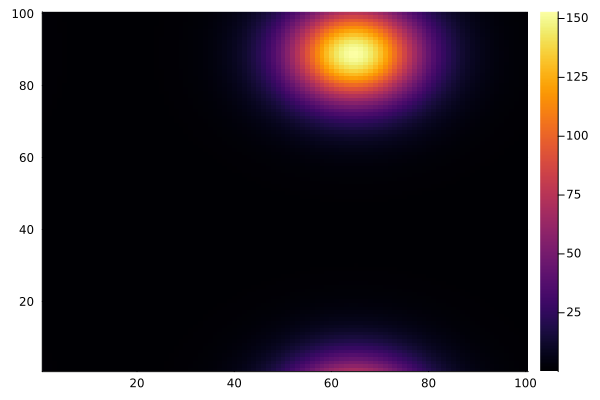

In [356]:
heatmap(sol[:,:,1,end])

In [363]:
# For all random seeds
# For each radius
# Record number of patches
# Record intensity of patches
# Record stdev for patch intensity

seeds = (1,2,3,4,5,6,7,8,9,10)
radii = [2,3,4,5,6,7,8,10]

avg_m = []
std_m = []
avg_n = []
std_n = []

for radius in radii
    n = []
    m = []
    for seed in seeds
        sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp");
        locs = findlocalmaxima(sol[:,:,1,end], edges=false)
        maxima = sol[:,:,1,end][locs]
        maxima = maxima[maxima .> 10]
        append!(m, maxima)
        append!(n, length(maxima))
    end
    append!(avg_n, mean(n))
    append!(avg_m, mean(m))
    append!(std_n, std(n)*(!isnan(std(n)))) # workaround to transform NaN to 0
    append!(std_m, std(m)*(!isnan(std(m))))
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

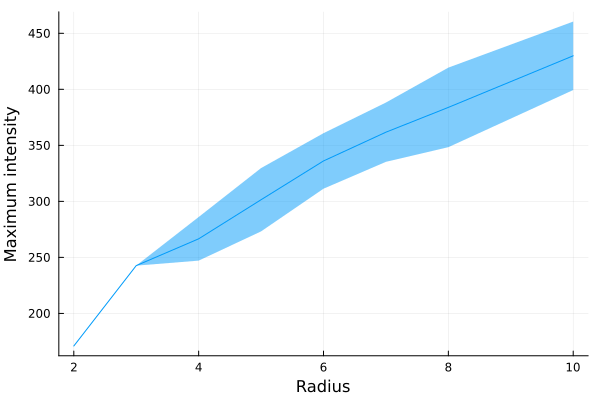

In [364]:
plot(radii, avg_m, ribbon=std_m, fillalpha=.5, label=false, xaxis="Radius", yaxis="Maximum intensity")
#savefig("maxint_by_r_tmp.png")

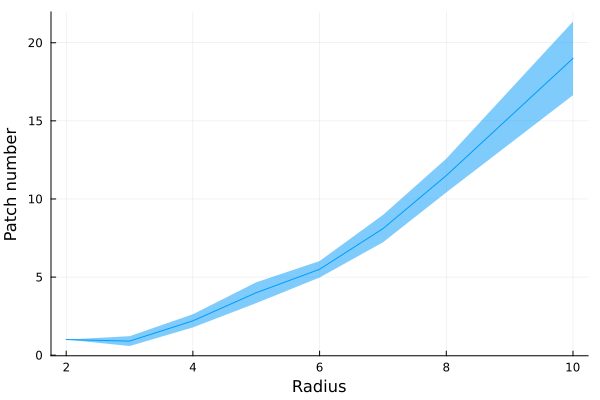

In [365]:
plot(radii, avg_n, ribbon=std_n, fillalpha=.5, label=false, xaxis="Radius", yaxis="Patch number")
#savefig("maxn_by_r_tmp.png")

In [166]:
# For sims with radius r, record number of spots over all random seeds
seed = 4
maxes = Dict()
scatter()
for radius in (2,3,4,5,6,7,8,10)
    sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp")
    locs = findlocalmaxima(sol[:,:,1,end], edges=false)
    maxima = sol[:,:,1,end][locs]
    maxes[radius] = maxima
    for m in maxima
        scatter!([radius], [m], label=false, color="red", alpha=0.5)
    end
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

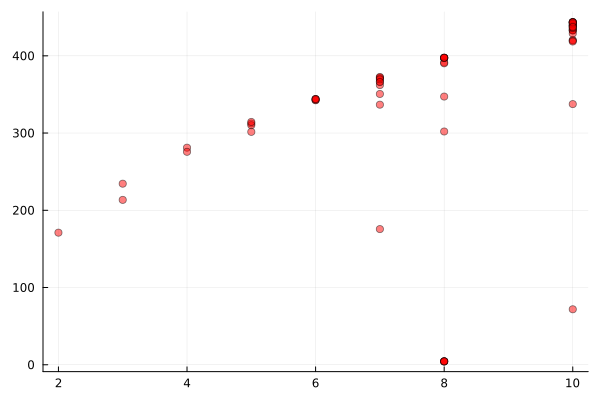

In [167]:
scatter!()

In [168]:
seed = 5
maxes = Dict()
for radius in (2,3,4,5,6,7,8,10)
    sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp")
    locs = findlocalmaxima(sol[:,:,1,end], edges=false)
    maxima = sol[:,:,1,end][locs]
    maxes[radius] = maxima
    for m in maxima
        scatter!([radius], [m], label=false, color="blue", alpha=0.5)
    end
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

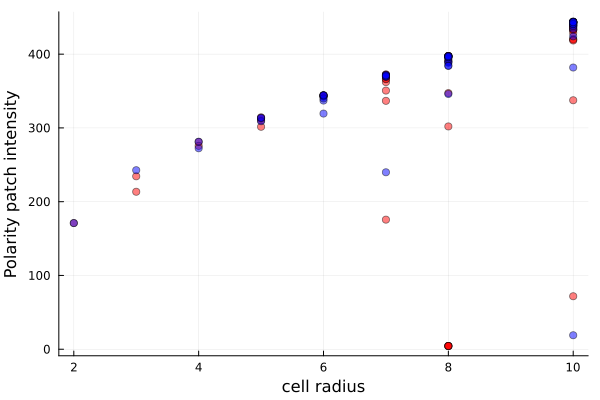

In [170]:
scatter!(xlabel = "cell radius", ylabel = "Polarity patch intensity")
#savefig("maxconc_by_r_tmp.png")

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

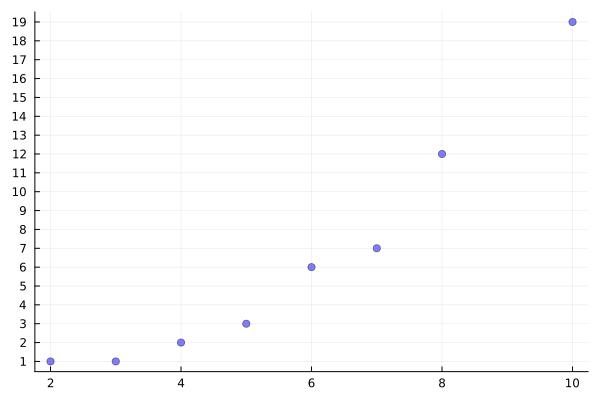

In [151]:
seed = 5
maxes = Dict()
scatter()
for radius in (2,3,4,5,6,7,8,10)
    sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp")
    locs = findlocalmaxima(sol[:,:,1,end], edges=false)
    maxima = sol[:,:,1,end][locs]
    nmax = length(maxima[maxima .> 100])
    scatter!([radius], [nmax], label=false, color="blue", alpha=0.5, ytick=(1:20))
end
scatter!()

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

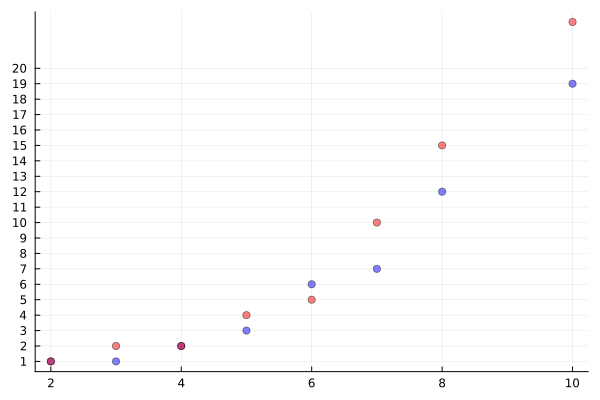

In [152]:
seed = 4
maxes = Dict()
for radius in (2,3,4,5,6,7,8,10)
    sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp")
    locs = findlocalmaxima(sol[:,:,1,end], edges=false)
    maxima = sol[:,:,1,end][locs]
    nmax = length(maxima[maxima .> 100])
    scatter!([radius], [nmax], label=false, color="red", alpha=0.5, ytick=(1:20))
end
scatter!()

In [160]:
scatter!(xlabel = "cell radius", ylabel = "number of polarity patches", ytick=(1:25))
#savefig("n_by_r_tmp.png")

"/home/dinosaur/Lab/Polarity/proj/Simulations/notebooks/n_by_r_tmp.png"

In [220]:
# For sims with radius r, record number of spots over all random seeds
seed = 5
means = []
stds = []
for radius in (2,3,4,5,6,7,8,10)
    sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp")
    locs = findlocalmaxima(sol[:,:,1,end], edges=false)
    maxima = sol[:,:,1,end][locs]
    append!(means, mean(maxima[maxima .> 100]))
    append!(stds, std(maxima[maxima .> 100]))
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

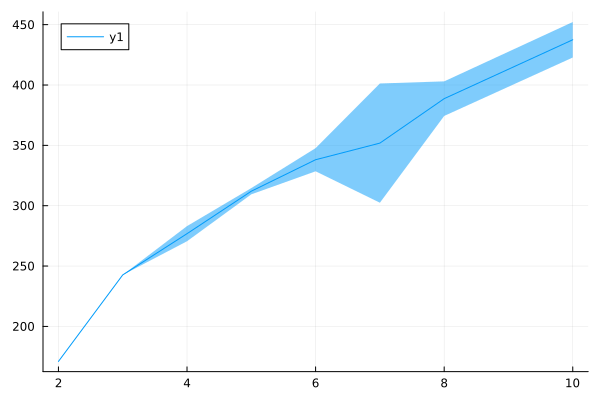

In [223]:
x=[2,3,4,5,6,7,8,10]
stds[isnan.(stds)] .= 0
plot(x,means,ribbon=stds,fillalpha=.5)